In [62]:
import pandas as pd
import numpy as np

In [63]:
file = "Jobs NG.csv"

In [64]:
df = pd.read_csv(file)
df.head()

,name,job_url,hiring_firm,hiring_firm_url,job_function,title,date_posted,Location,Job type,Industry,Salary,details,info
0,Chief Financial Officer (CFO),https://www.jobberman.com/listings/chief-finan...,Gelose Marine Nigeria Limited,https://www.jobberman.com/jobs?q=Gelose%20Mari...,"Job Function\n: Accounting, Auditing & Finance",Chief Financial Officer (CFO),2 weeks ago,Port Harcourt & Rivers State,Full Time,"Banking, Finance & Insurance","NGN\n\n600,000 - 900,000","['Minimum Qualification\n:\nDegree', 'Experien...",['Develop and implement financial strategies t...
1,3D Manager,https://www.jobberman.com/listings/3d-manager-...,Quorum West Africa,https://www.jobberman.com/jobs?q=Quorum%20West...,Job Function\n: Creative & Design,3D Manager,1 week ago,Abuja,Full Time,"Entertainment, Events & Sport","NGN\n\n150,000 - 250,000","['Minimum Qualification\n:\nDegree', 'Experien...","['Using 3D modeling, texture, mapping, and oth..."
2,Advocacy and Communications officer,https://www.jobberman.com/listings/advocacy-an...,Jileson Hub Plus Limited,https://www.jobberman.com/jobs?q=Jileson%20Hub...,Job Function\n: Community & Social Services,Advocacy and Communications officer,2 weeks ago,Rest of Nigeria (Kano),Full Time,Construction,"NGN\n\n150,000 - 250,000","['Minimum Qualification\n:\nDegree', 'Experien...",['Identifying advocacy opportunities and prior...
3,Driver,https://www.jobberman.com/listings/driver-evvx45,Espago Luxe Enterprises,https://www.jobberman.com/jobs?q=Espago%20Luxe...,Job Function\n: Driver & Transport Services,Driver,Today,Lagos,Full Time,"Retail, Fashion & FMCG","NGN\n\n75,000 - 150,000","['Minimum Qualification\n:\nVocational', 'Expe...","['Collect goods from a shop, warehouse, or col..."
4,Store Manager,https://www.jobberman.com/listings/store-manag...,Espago Luxe Enterprises,https://www.jobberman.com/jobs?q=Espago%20Luxe...,Job Function\n: Management & Business Development,Store Manager,Today,Lagos,Full Time,"Retail, Fashion & FMCG","NGN\n\n75,000 - 150,000","['Minimum Qualification\n:\nOND', 'Experience ...","[""Develop business strategies to raise our cus..."


In [67]:
df.date_posted.unique()

array(['2 weeks ago', '1 week ago', 'Today', '3 days ago', '4 days ago',
       '5 days ago', '6 days ago', '1 month ago', '3 weeks ago',
       '4 weeks ago', '2 months ago', 'Yesterday', '2 days ago'],
      dtype=object)

In [68]:
from datetime import datetime, timedelta
import re

In [69]:
current_date = datetime.strptime('2024-07-25', '%Y-%m-%d').date()

In [70]:
def convert_relative_dates(date_str, current_date):
    date_str = date_str.lower()
    if date_str == 'today':
        return current_date
    elif date_str == 'yesterday':
        return current_date - timedelta(days=1)
    elif 'day' in date_str:
        days = int(date_str.split()[0])
        return current_date - timedelta(days=days)
    elif 'week' in date_str:
        weeks = int(date_str.split()[0])
        return current_date - timedelta(weeks=weeks)
    elif 'month' in date_str:
        months = int(date_str.split()[0])
        return current_date - timedelta(days=30*months)
    else:
        return None


In [71]:
def extract_currency(salary_str):
    return salary_str.split('\n\n')[0]

def extract_min_salary(salary_str):
    if 'Confidential' in salary_str:
        return 'Confidential'
    elif 'Commission Only' in salary_str:
        return 'Commission Only'
    elif 'Less than' in salary_str:
        return re.findall(r'\d+', salary_str.replace(',', ''))[0]
    elif 'More than' in salary_str:
        return re.findall(r'\d+', salary_str.replace(',', ''))[0]
    else:
        return salary_str.split('\n\n')[1].split(' - ')[0].replace(',', '')

def extract_max_salary(salary_str):
    if 'Confidential' in salary_str:
        return 'Confidential'
    elif 'Commission Only' in salary_str:
        return 'Commission Only'
    elif 'Less than' in salary_str:
        return re.findall(r'\d+', salary_str.replace(',', ''))[0]
    elif 'More than' in salary_str:
        return re.findall(r'\d+', salary_str.replace(',', ''))[0]  # Adjust if necessary for more precise handling
    else:
        return salary_str.split('\n\n')[1].split(' - ')[-1].replace(',', '')


In [72]:
df['date_posted'] = df.date_posted.apply(lambda x: convert_relative_dates(x, current_date))

In [73]:
df['currency'] = df['Salary'].apply(extract_currency)
df['min_salary'] = df['Salary'].apply(extract_min_salary)
df['max_salary'] = df['Salary'].apply(extract_max_salary)


In [75]:
df

,name,job_url,hiring_firm,hiring_firm_url,job_function,title,date_posted,Location,Job type,Industry,Salary,details,info,currency,min_salary,max_salary
0,Chief Financial Officer (CFO),https://www.jobberman.com/listings/chief-finan...,Gelose Marine Nigeria Limited,https://www.jobberman.com/jobs?q=Gelose%20Mari...,"Job Function\n: Accounting, Auditing & Finance",Chief Financial Officer (CFO),2024-07-11,Port Harcourt & Rivers State,Full Time,"Banking, Finance & Insurance","NGN\n\n600,000 - 900,000","['Minimum Qualification\n:\nDegree', 'Experien...",['Develop and implement financial strategies t...,NGN,600000,900000
1,3D Manager,https://www.jobberman.com/listings/3d-manager-...,Quorum West Africa,https://www.jobberman.com/jobs?q=Quorum%20West...,Job Function\n: Creative & Design,3D Manager,2024-07-18,Abuja,Full Time,"Entertainment, Events & Sport","NGN\n\n150,000 - 250,000","['Minimum Qualification\n:\nDegree', 'Experien...","['Using 3D modeling, texture, mapping, and oth...",NGN,150000,250000
2,Advocacy and Communications officer,https://www.jobberman.com/listings/advocacy-an...,Jileson Hub Plus Limited,https://www.jobberman.com/jobs?q=Jileson%20Hub...,Job Function\n: Community & Social Services,Advocacy and Communications officer,2024-07-11,Rest of Nigeria (Kano),Full Time,Construction,"NGN\n\n150,000 - 250,000","['Minimum Qualification\n:\nDegree', 'Experien...",['Identifying advocacy opportunities and prior...,NGN,150000,250000
3,Driver,https://www.jobberman.com/listings/driver-evvx45,Espago Luxe Enterprises,https://www.jobberman.com/jobs?q=Espago%20Luxe...,Job Function\n: Driver & Transport Services,Driver,2024-07-25,Lagos,Full Time,"Retail, Fashion & FMCG","NGN\n\n75,000 - 150,000","['Minimum Qualification\n:\nVocational', 'Expe...","['Collect goods from a shop, warehouse, or col...",NGN,75000,150000
4,Store Manager,https://www.jobberman.com/listings/store-manag...,Espago Luxe Enterprises,https://www.jobberman.com/jobs?q=Espago%20Luxe...,Job Function\n: Management & Business Development,Store Manager,2024-07-25,Lagos,Full Time,"Retail, Fashion & FMCG","NGN\n\n75,000 - 150,000","['Minimum Qualification\n:\nOND', 'Experience ...","[""Develop business strategies to raise our cus...",NGN,75000,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,Managing Partner - Recruitment Franchisee Port...,https://www.jobberman.com/listings/managing-pa...,Antal International,NaN,Job Function\n: Human Resources,Managing Partner - Recruitment Franchisee Port...,2024-07-18,Unspecified,Unspecified,NaN,NGN\n\nConfidential,[],[],NGN,Confidential,Confidential
3260,Managing Partner - Recruitment Franchisee Nigeria,https://www.jobberman.com/listings/managing-pa...,Antal International,NaN,Job Function\n: Human Resources,Managing Partner - Recruitment Franchisee Nigeria,2024-07-18,Unspecified,Unspecified,NaN,NGN\n\nConfidential,[],[],NGN,Confidential,Confidential
3261,AGENT DE PRECONTRAINTE (H/F),https://www.jobberman.com/listings/agent-de-pr...,Tribay Agence d'Emploi,NaN,Job Function\n: Sales,AGENT DE PRECONTRAINTE (H/F),2024-06-25,Unspecified,Unspecified,NaN,NGN\n\nConfidential,[],[],NGN,Confidential,Confidential
3262,Accountant,https://www.jobberman.com/listings/accountant-...,Sunrose Consulting,NaN,"Job Function\n: Accounting, Auditing & Finance",Accountant,2024-06-25,Lagos,Unspecified,"Banking, Finance & Insurance",NGN\n\nConfidential,[],[],NGN,Confidential,Confidential


In [86]:
deets = ["Minimum Qualification", "Experience Level", "Experience Length"]
df[deets] = df.details.str.replace("]", "").str.split("', ", expand=True)

for deet in deets:
    df[deet] = df[deet].str.split(":", expand=True)[1].str.strip("\\n")

In [91]:
df.head()

,name,job_url,hiring_firm,hiring_firm_url,job_function,title,date_posted,Location,Job type,Industry,Salary,details,info,currency,min_salary,max_salary,Minimum Qualification,Experience Level,Experience Length
0,Chief Financial Officer (CFO),https://www.jobberman.com/listings/chief-finan...,Gelose Marine Nigeria Limited,https://www.jobberman.com/jobs?q=Gelose%20Mari...,"Job Function\n: Accounting, Auditing & Finance",Chief Financial Officer (CFO),2024-07-11,Port Harcourt & Rivers State,Full Time,"Banking, Finance & Insurance","NGN\n\n600,000 - 900,000","['Minimum Qualification\n:\nDegree', 'Experien...",['Develop and implement financial strategies t...,NGN,600000,900000,Degree,Executive level,10 years'
1,3D Manager,https://www.jobberman.com/listings/3d-manager-...,Quorum West Africa,https://www.jobberman.com/jobs?q=Quorum%20West...,Job Function\n: Creative & Design,3D Manager,2024-07-18,Abuja,Full Time,"Entertainment, Events & Sport","NGN\n\n150,000 - 250,000","['Minimum Qualification\n:\nDegree', 'Experien...","['Using 3D modeling, texture, mapping, and oth...",NGN,150000,250000,Degree,Mid level,4 years'
2,Advocacy and Communications officer,https://www.jobberman.com/listings/advocacy-an...,Jileson Hub Plus Limited,https://www.jobberman.com/jobs?q=Jileson%20Hub...,Job Function\n: Community & Social Services,Advocacy and Communications officer,2024-07-11,Rest of Nigeria (Kano),Full Time,Construction,"NGN\n\n150,000 - 250,000","['Minimum Qualification\n:\nDegree', 'Experien...",['Identifying advocacy opportunities and prior...,NGN,150000,250000,Degree,Mid level,3 years'
3,Driver,https://www.jobberman.com/listings/driver-evvx45,Espago Luxe Enterprises,https://www.jobberman.com/jobs?q=Espago%20Luxe...,Job Function\n: Driver & Transport Services,Driver,2024-07-25,Lagos,Full Time,"Retail, Fashion & FMCG","NGN\n\n75,000 - 150,000","['Minimum Qualification\n:\nVocational', 'Expe...","['Collect goods from a shop, warehouse, or col...",NGN,75000,150000,Vocational,Entry level,1 year'
4,Store Manager,https://www.jobberman.com/listings/store-manag...,Espago Luxe Enterprises,https://www.jobberman.com/jobs?q=Espago%20Luxe...,Job Function\n: Management & Business Development,Store Manager,2024-07-25,Lagos,Full Time,"Retail, Fashion & FMCG","NGN\n\n75,000 - 150,000","['Minimum Qualification\n:\nOND', 'Experience ...","[""Develop business strategies to raise our cus...",NGN,75000,150000,OND,Mid level,3 years'


In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [40]:
text = " ".join(df['info'].tolist())

In [57]:
# Define additional stopwords specific to job posts
additional_stopwords = {
    'job', 'position', 'role', 'opportunity', 'opening', 'vacancy', 'career',
    'application', 'apply', 'candidate', 'requirement', 'qualification', 'responsibility',
    'responsibilities', 'duties', 'duty', 'skills', 'experience', 'required', 'desired',
    'preferred', 'ability', 'knowledge', 'company', 'organization', 'department', 'team',
    'employer', 'employee', 'employment', 'work', 'working', 'benefits', 'compensation',
    'salary', 'pay', 'full-time', 'part-time', 'contract', 'permanent', 'hire', 'hiring',
    'location', 'address', 'city', 'state', 'contact', 'email', 'phone', 'number', 'etc',
    'including', 'based', 'ensure', 'e.g.', 'i.e.'
}

In [58]:
# Define stopwords
stopwords = set(STOPWORDS).union(additional_stopwords)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_font_size=120,
    max_words=100,
    contour_color='steelblue',
    contour_width=3
).generate(text)


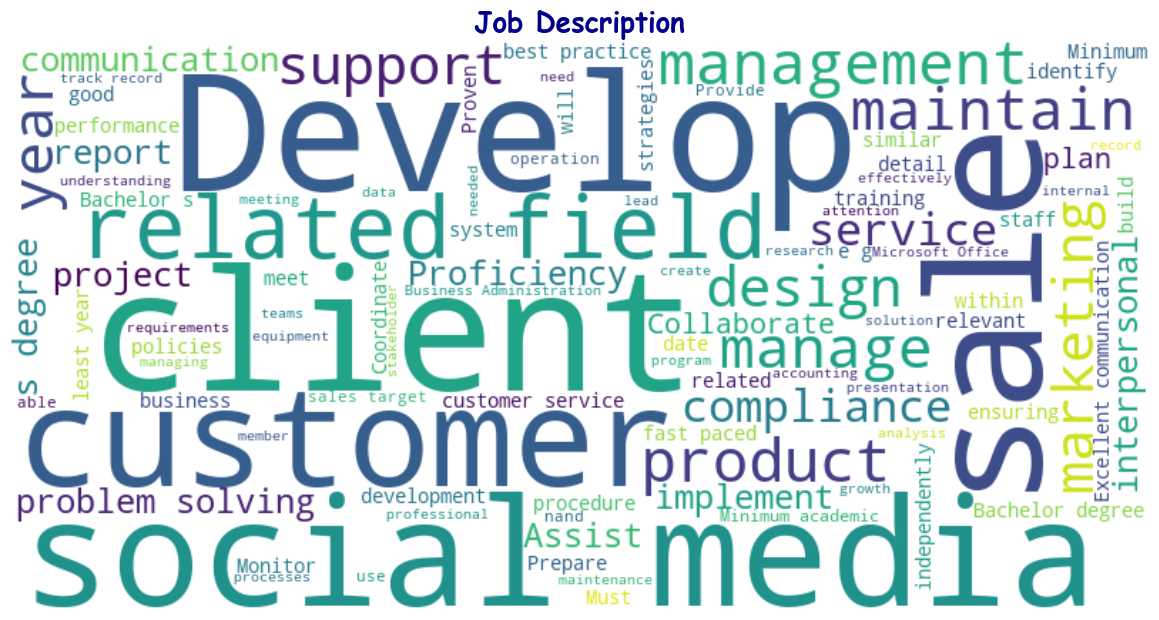

In [60]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Description', fontsize=20, color='darkblue', weight='bold', fontfamily='comic sans ms')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
df.to_csv("Cleaned Jobs NG.csv", index=False)